In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("main_data_processed_stripped.csv")

In [80]:
df_demographic = df[["gender", "age", "qualification", "english_prof", "past_amr_experience_check"]]

In [81]:
df_demographic.head()

,gender,age,qualification,english_prof,past_amr_experience_check
0,Male,56,High school diploma or equivalent,Native or Bilingual Proficiency,1
1,Female,57,Master's degree or higher,Full Professional Proficiency,3
2,Male,33,High school diploma or equivalent,Native or Bilingual Proficiency,3
3,Female,48,Bachelor's degree,Native or Bilingual Proficiency,2
4,Non-Binary,30,Master's degree or higher,Minimum Professional Proficiency,4


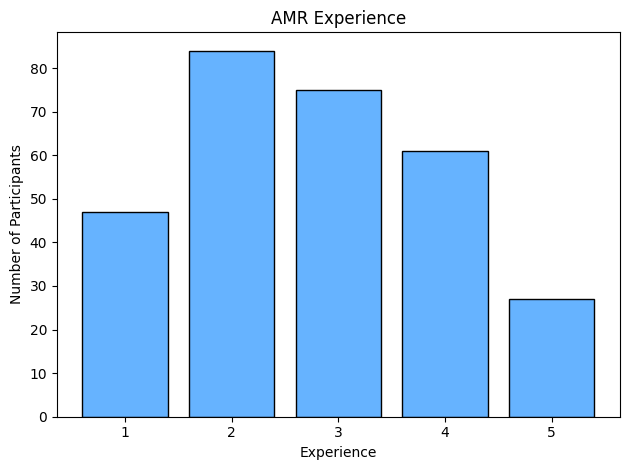

In [82]:
## Past AMR experience check
plt.bar(df_demographic['past_amr_experience_check'].value_counts().index, df_demographic['past_amr_experience_check'].value_counts(), color='#66b3ff', edgecolor='black')
plt.title('AMR Experience')
plt.xlabel('Experience')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()

In [83]:
df_demographic["past_amr_experience_check"].value_counts()

past_amr_experience_check
2    84
3    75
4    61
1    47
5    27
Name: count, dtype: int64

In [84]:
df_demographic.describe()

,age,past_amr_experience_check
count,294.000000,294.000000
mean,31.210884,2.785714
std,9.914812,1.207909
min,18.000000,1.000000
25%,24.000000,2.000000
50%,28.000000,3.000000
75%,36.000000,4.000000
max,68.000000,5.000000


In [85]:
df_demographic["gender"].value_counts()

gender
Male          146
Female        142
Non-Binary      6
Name: count, dtype: int64

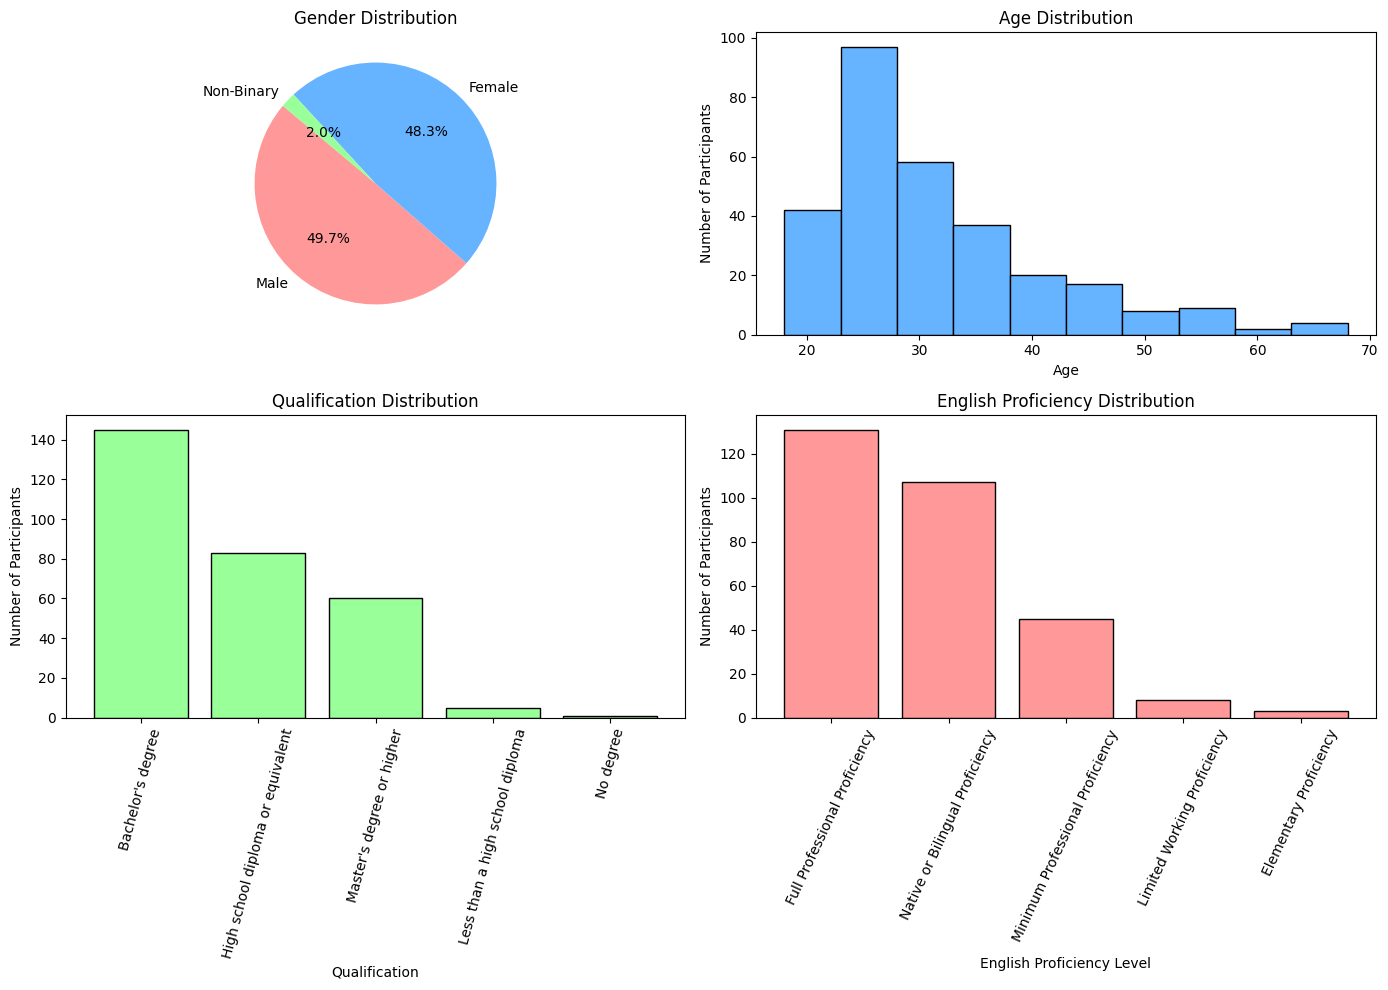

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

# Visualizing demographic data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

gender_counts = df_demographic["gender"].value_counts()

# Gender distribution
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
axs[0, 0].set_title('Gender Distribution')

# Age distribution
axs[0, 1].hist(df_demographic['age'], bins=10, color='#66b3ff', edgecolor='black')
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Number of Participants')

# Qualification distribution
qualification_counts = df_demographic["qualification"].value_counts()
axs[1, 0].bar(qualification_counts.index, qualification_counts.values, color='#99ff99', edgecolor='black')
axs[1, 0].set_title('Qualification Distribution')
axs[1, 0].set_xlabel('Qualification', )
axs[1, 0].set_ylabel('Number of Participants')
axs[1, 0].tick_params(axis='x', rotation=75)

# English proficiency distribution
english_prof_counts = df_demographic["english_prof"].value_counts()
axs[1, 1].bar(english_prof_counts.index, english_prof_counts.values, color='#ff9999', edgecolor='black')
axs[1, 1].set_title('English Proficiency Distribution')
axs[1, 1].set_xlabel('English Proficiency Level', labelpad=10.0)
axs[1, 1].set_ylabel('Number of Participants')
axs[1, 1].tick_params(axis='x', rotation=65)

plt.tight_layout()
plt.show()


In [87]:
from texthero import preprocessing
import texthero as hero

interaction_4_communicating_intent_check
Somewhat agree                42.176871
Strongly agree                27.891156
Neither agree nor disagree    14.625850
Somewhat disagree              7.823129
Strongly disagree              7.482993
Name: count, dtype: float64
interaction_4_communicating_intent_check
Somewhat agree                124
Strongly agree                 82
Neither agree nor disagree     43
Somewhat disagree              23
Strongly disagree              22
Name: count, dtype: int64


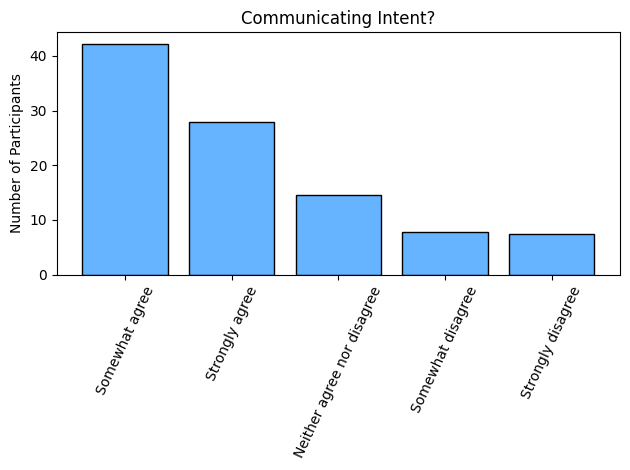

In [95]:
intention_check = df["interaction_4_communicating_intent_check"].value_counts()
print(intention_check*100/294)
print(intention_check)
plt.bar(intention_check.index, intention_check*100/294, color='#66b3ff', edgecolor='black')
plt.title('Communicating Intent?')
plt.ylabel('Number of Participants')
plt.tick_params(axis='x', rotation=65)
plt.tight_layout()
plt.show()

In [96]:
interaction_response = preprocessing.clean(df["interaction_4_describe"])

In [97]:
hero.top_words(interaction_response)

interaction_4_describe
mower     183
person    178
around    149
back      117
human      89
         ... 
miss        1
want        1
means       1
couple      1
user        1
Name: count, Length: 663, dtype: int64

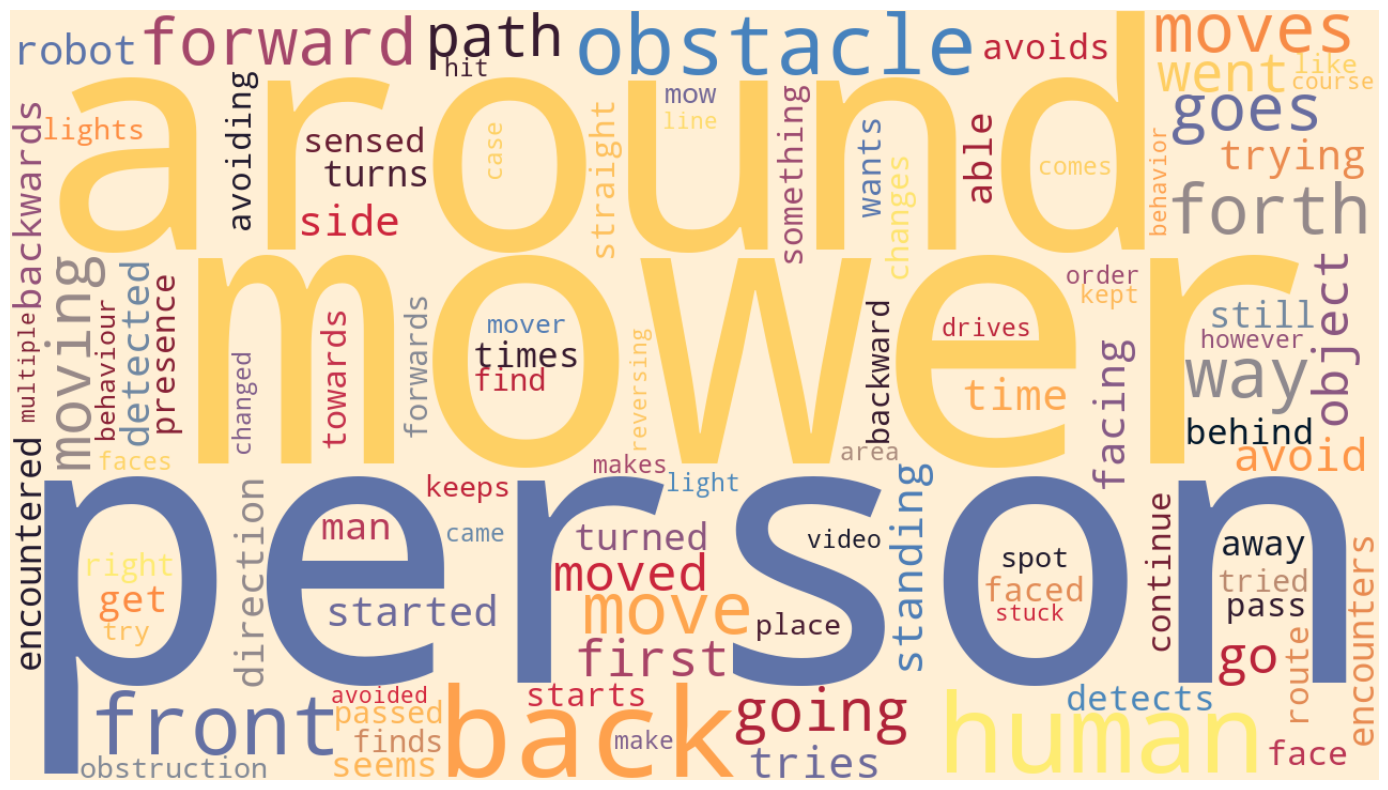

In [98]:
from texthero import visualization

visualization.wordcloud(interaction_response, width=1280, height=720, max_words=100)

In [92]:
from wordcloud import WordCloud
pd.set_option('display.max_colwidth', None)
df_select_agree = df[(df["interaction_3_communicating_intent_check"] == "Strongly agree") | (df["interaction_3_communicating_intent_check"] == "Somewhat agree")]
agree_responses = preprocessing.clean(df_select_agree["interaction_3_communicating_response"])
print(df_select_agree["interaction_3_communicating_response"])
# visualization.wordcloud(agree_responses, width=1280, height=720, max_words=100)


0                                                                                                                                                                                                                                                                                                                                                            that the mower is aware of obstacles and will not advance until clear
2                                                                                                                                                                                                                                                                                                                                                                  It was trying to communicate that it wished to pass the person.
3                                                                                                                                                                 

In [93]:
pd.set_option('display.max_colwidth', None)
df_select_disagree = df[(df["interaction_3_communicating_intent_check"] == "Neither agree nor disagree") | (df["interaction_3_communicating_intent_check"] == "Somewhat disagree") | (df["interaction_3_communicating_intent_check"] == "Strongly disagree")]
disagree_responses = preprocessing.clean(df_select_agree["interaction_3_communicating_response"])
print(df_select_agree["interaction_3_communicating_response"])
# visualization.wordcloud(disagree_responses, width=1280, height=720, max_words=100)

0                                                                                                                                                                                                                                                                                                                                                            that the mower is aware of obstacles and will not advance until clear
2                                                                                                                                                                                                                                                                                                                                                                  It was trying to communicate that it wished to pass the person.
3                                                                                                                                                                 

In [94]:
print(df["interaction_3_light_behaviour"])

0                                                                                                                                                                                                                                                                                                                                                                                                                              moderately important to give confidence that movement is intentional
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NaN
2                               